In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [4]:
heart = pd.read_csv('dataset/cardiovascular.txt',delimiter=';')
#heart = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')
#saturation = pd.read_csv ('dataset/o2Saturation.csv')

In [5]:
heart.head()

ind  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    1  160    12.00  5.73      23.11  Present     49    25.30    97.20   52   
1    2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63   
2    3  118     0.08  3.48      32.28  Present     52    29.14     3.81   46   
3    4  170     7.50  6.41      38.03  Present     51    31.99    24.26   58   
4    5  134    13.60  3.50      27.78  Present     60    25.99    57.34   49   

   chd  
0    1  
1    1  
2    0  
3    1  
4    1

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### data description
- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
heart.isna().sum()

ind          0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

### data Preprocessing 

In [7]:
dataset = heart
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset

ind  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0      1  160    12.00   5.73      23.11  Present     49    25.30    97.20   
1      2  144     0.01   4.41      28.61   Absent     55    28.87     2.06   
2      3  118     0.08   3.48      32.28  Present     52    29.14     3.81   
3      4  170     7.50   6.41      38.03  Present     51    31.99    24.26   
4      5  134    13.60   3.50      27.78  Present     60    25.99    57.34   
..   ...  ...      ...    ...        ...      ...    ...      ...      ...   
457  459  214     0.40   5.98      31.72   Absent     64    28.45     0.00   
458  460  182     4.20   4.41      32.10   Absent     52    28.61    18.72   
459  461  108     3.00   1.59      15.23   Absent     40    20.09    26.64   
460  462  118     5.40  11.61      30.79   Absent     64    27.35    23.97   
461  463  132     0.00   4.82      33.41  Present     62    14.70     0.00   

     age  chd  
0     52    1  
1     63    1  
2     46    0  
3     58    1  
4     49    1  
..   ...  ...  
457   58    0  
458   52    1  
459   55    0  
460   40    0  
461   46    1  

[462 rows x 11 columns]

In [8]:
dataset = dataset.drop('ind', axis=1)

In [9]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dataset['famhist']= label_encoder.fit_transform(dataset['famhist'])

In [10]:
dataset 


sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [11]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

In [12]:
# finding optimal value of k
def hyper_tune(X,y):
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
    
    
    error_rate = []
    for i in range(1,40):

         knn = KNeighborsClassifier(n_neighbors=i)
         knn.fit(X_train,y_train)
         pred_i = knn.predict(X_test)
         error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)
    return(error_rate.index(min(error_rate)) + 1)


## Train the KNN Classifier

In [15]:
def calculate_model(k,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            t0= time.time()
            model = KNeighborsClassifier(n_neighbors = k)

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)



        #print(accuracy_10)
        #print(precision_list_10)
        #print(recall_list_10)\

        #print(f1_list_10)
        #print(specificity_10)




   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])


In [16]:
dict_knn = {}

## Std model 

In [17]:

X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)

k= 5
X=scaled_features
result = calculate_model(k,X,y)
dict_knn['Std_scalar'] = result
dict_knn


{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593]}

## Std Scalar + optimal value model

Minimum error:- 0.26881720430107525 at K = 23


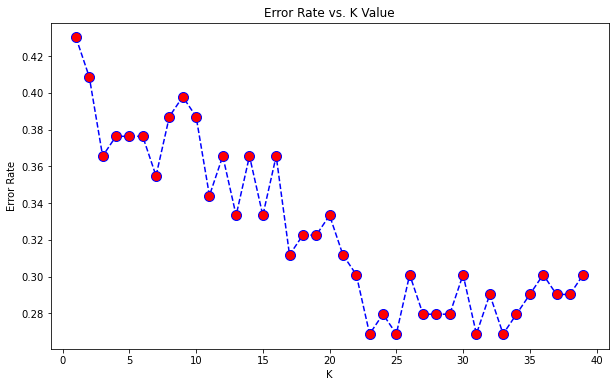

In [18]:
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split

X= scaled_features                                                 
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['Optimal_k'] = result



In [19]:
dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436]}

## Sequential Forward Search/Backward search

In [24]:
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
# Sequential Forward Selection
knn = KNeighborsClassifier()
sfs = SFS(knn, 
          k_features= 8, 
          forward=True, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection :
(0, 1, 2, 3, 4, 6, 7, 8)
CV Score:
0.6909663087745279


[0, 1, 2, 3, 4, 6, 7, 8]
Minimum error:- 0.2903225806451613 at K = 33


[72.3936170212766,
 72.60867837819966,
 68.48803323582734,
 72.3936170212766,
 69.90961374697305,
 75.02873244560291,
 0.003904089132944743]

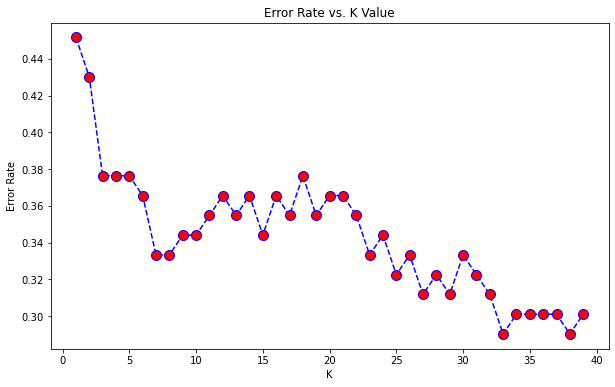

In [25]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)


X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['SFS'] = result
result

In [29]:
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
# Sequential Forward Selection
knn = KNeighborsClassifier()
sfs = SFS(knn, 
          k_features= 8, 
          forward=False, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection :
(1, 2, 3, 4, 5, 6, 7, 8)
CV Score:
0.7020362828582006


[1, 2, 3, 4, 5, 6, 7, 8]
Minimum error:- 0.3010752688172043 at K = 37


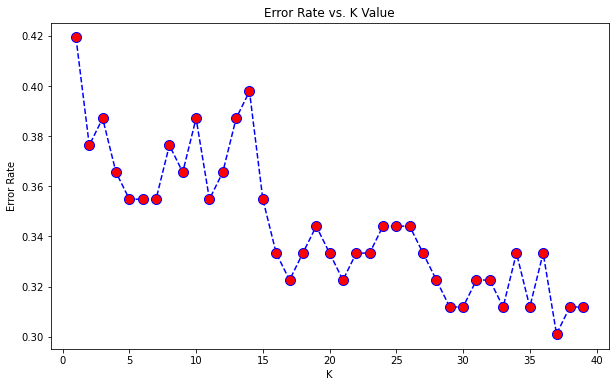

In [30]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)


X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['SBS'] = result


## Mutual info

In [31]:
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
#Mutual Inormation

age          0.083294
typea        0.052963
famhist      0.036761
tobacco      0.022645
sbp          0.008122
alcohol      0.002678
obesity      0.000000
adiposity    0.000000
ldl          0.000000
dtype: float64

Minimum error:- 0.2903225806451613 at K = 34


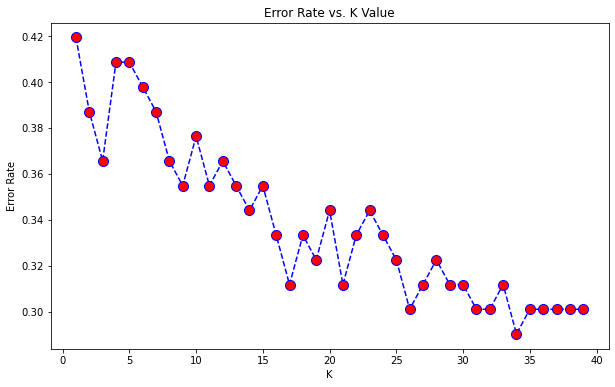

In [33]:

X = dataset[['age','typea','famhist','tobacco','sbp','alcohol']].values
y = dataset.iloc[:, -1].values

X= standardise(X)                      
k= hyper_tune(X,y)


result = calculate_model(k,X,y)
dict_knn['MI'] = result


In [34]:
dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436],
 'SFS': [72.3936170212766,
  72.60867837819966,
  68.48803323582734,
  72.3936170212766,
  69.90961374697305,
  75.02873244560291,
  0.003904089132944743],
 'SBS': [72.14030218933087,
  72.47728488180442,
  68.21311210575917,
  72.14030218933087,
  69.5411905534536,
  75.66467321470195,
  0.00415654182434082],
 'MI': [70.71507863089732,
  70.83975112750359,
  65.98777611277612,
  70.71507863089732,
  67.45118384283109,
  75.45493584810009,
  0.003720560073852539]}

## Chi square 

In [35]:
from sklearn.feature_selection import chi2
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )


f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

age          6.279899e-53
tobacco      2.721355e-28
adiposity    4.671256e-11
sbp          6.528038e-10
ldl          1.804520e-06
famhist      7.681966e-05
alcohol      3.558732e-04
typea        1.855410e-02
obesity      3.070767e-01
dtype: float64

Minimum error:- 0.3118279569892473 at K = 33


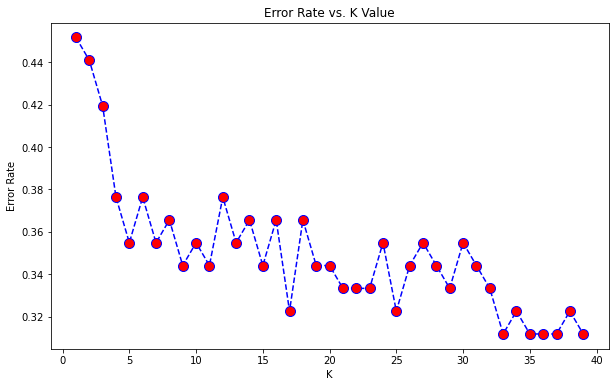

In [38]:

X = dataset[['age','adiposity','famhist','tobacco','sbp','ldl','alcohol']].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X = scaled_features
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Chi'] = result

In [39]:
#del dict_knn['Chi']
dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436],
 'SFS': [72.3936170212766,
  72.60867837819966,
  68.48803323582734,
  72.3936170212766,
  69.90961374697305,
  75.02873244560291,
  0.003904089132944743],
 'SBS': [72.14030218933087,
  72.47728488180442,
  68.21311210575917,
  72.14030218933087,
  69.5411905534536,
  75.66467321470195,
  0.00415654182434082],
 'MI': [70.71507863089732,
  70.83975112750359,
  65.98777611277612,
  70.71507863089732,
  67.45118384283109,
  75.45493584810009,
  0.003720560073852539],
 'Chi': [72.13675609004008,
  72.5364475518267,
  67.3223840973841,
  72.13675609004008,
  69.85189828916037,
  75.04167398739516,
  0.004279909133911132]}

### EFS 

In [ ]:
#pip install --upgrade pip mlxtend  

Features: 510/510

Best accuracy score: 0.72
Best subset (indices): (0, 1, 2, 4, 5)
Best subset (corresponding names): ('0', '1', '2', '4', '5')
Minimum error:- 0.26881720430107525 at K = 21
21


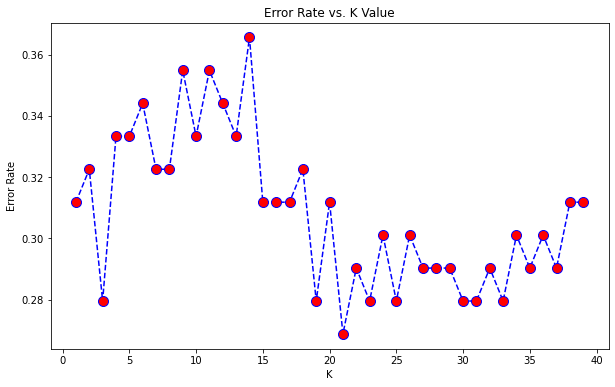

In [40]:
# Import logistic regression from Scikit-learn
# Import ExhaustiveFeatureSelector from Mlxtend
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101)
knn = KNeighborsClassifier()

# Create an EFS object
efs = EFS(estimator=knn,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=8,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(scaled_features, y)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

feat_cols = list( efs.best_idx_)
feat_cols
#X_train = X_train[:, feat_cols]
#X_test = X_test[:, feat_cols]

X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)
print(k)

result = calculate_model(k,X,y)
dict_knn['EFS'] = result

In [42]:
dataset

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [41]:
dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436],
 'SFS': [72.3936170212766,
  72.60867837819966,
  68.48803323582734,
  72.3936170212766,
  69.90961374697305,
  75.02873244560291,
  0.003904089132944743],
 'SBS': [72.14030218933087,
  72.47728488180442,
  68.21311210575917,
  72.14030218933087,
  69.5411905534536,
  75.66467321470195,
  0.00415654182434082],
 'MI': [70.71507863089732,
  70.83975112750359,
  65.98777611277612,
  70.71507863089732,
  67.45118384283109,
  75.45493584810009,
  0.003720560073852539],
 'Chi': [72.13675609004008,
  72.5364475518267,
  67.3223840973841,
  72.13675609004008,
  69.85189828916037,
  75.04167398739516,
  0.004279909133911132],
 'EFS': [71.75901942645699,
  71.78426358397

### discritizer 

In [45]:
categorical_cols = ['famhist']

numerical_cols = ['age','adiposity','tobacco','sbp','ldl','alcohol','typea','obesity']
target_col = ["chd"]

In [46]:
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
#num_cols = pd.DataFrame(data)
num_cols

0  1  2  3  4  5  6  7
0    7  4  3  5  3  6  5  3
1    9  6  0  3  2  0  6  4
2    6  7  0  1  1  0  6  4
3    8  8  2  5  3  1  5  5
4    6  5  4  2  1  3  7  3
..  .. .. .. .. .. .. .. ..
457  8  6  0  9  3  0  7  4
458  7  7  1  6  2  1  6  4
459  8  2  0  0  0  1  4  1
460  5  6  1  1  7  1  7  3
461  6  7  0  2  2  0  7  0

[462 rows x 8 columns]

In [47]:
num_cols.rename(columns = {0:'age', 1:'adiposity',2:'tobacco',3:'sbp',4:'ldl',5:'alcohol',6:'typea',7:'obesity'}, inplace = True)

In [48]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        462 non-null    int32
 1   adiposity  462 non-null    int32
 2   tobacco    462 non-null    int32
 3   sbp        462 non-null    int32
 4   ldl        462 non-null    int32
 5   alcohol    462 non-null    int32
 6   typea      462 non-null    int32
 7   obesity    462 non-null    int32
dtypes: int32(8)
memory usage: 14.6 KB


In [49]:
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
df_add


adiposity  age  alcohol  famhist  ldl  obesity  sbp  tobacco  typea
0            4    7        6        1    3        3    5        3      5
1            6    9        0        0    2        4    3        0      6
2            7    6        0        1    1        4    1        0      6
3            8    8        1        1    3        5    5        2      5
4            5    6        3        1    1        3    2        4      7
..         ...  ...      ...      ...  ...      ...  ...      ...    ...
457          6    8        0        0    3        4    9        0      7
458          7    7        1        0    2        4    6        1      6
459          2    8        1        0    0        1    0        0      4
460          6    5        1        0    7        3    1        1      7
461          7    6        0        1    2        0    2        0      7

[462 rows x 9 columns]

oldpeak     1.037818e-22
caa         1.341127e-11
cp          8.125199e-11
exng        1.022439e-05
thalachh    2.277983e-05
slp         9.434124e-03
age         1.340074e-02
thall       1.798765e-02
sex         2.788623e-02
trtbps      1.630069e-01
fbs         1.672147e-01
restecg     3.242724e-01
chol        6.151344e-01

Minimum error:- 0.27956989247311825 at K = 23


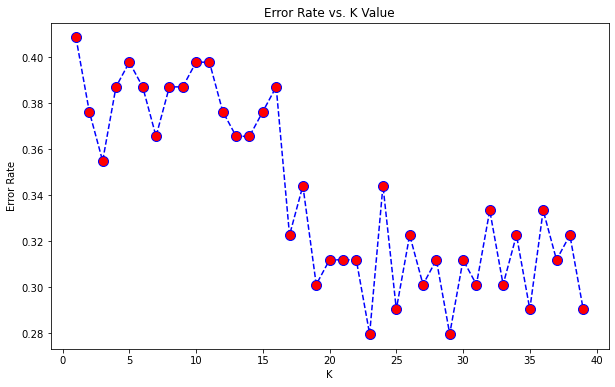

In [62]:
X = df_add.iloc[::].values
y = dataset.iloc[:, -1].values



X=standardise(X)                                         
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Disc'] = result

In [51]:
 dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436],
 'SFS': [72.3936170212766,
  72.60867837819966,
  68.48803323582734,
  72.3936170212766,
  69.90961374697305,
  75.02873244560291,
  0.003904089132944743],
 'SBS': [72.14030218933087,
  72.47728488180442,
  68.21311210575917,
  72.14030218933087,
  69.5411905534536,
  75.66467321470195,
  0.00415654182434082],
 'MI': [70.71507863089732,
  70.83975112750359,
  65.98777611277612,
  70.71507863089732,
  67.45118384283109,
  75.45493584810009,
  0.003720560073852539],
 'Chi': [72.13675609004008,
  72.5364475518267,
  67.3223840973841,
  72.13675609004008,
  69.85189828916037,
  75.04167398739516,
  0.004279909133911132],
 'EFS': [71.75901942645699,
  71.78426358397

## Discritization(uniform) + Chi


In [63]:
X =  df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

age          2.003996e-18
tobacco      4.440949e-11
ldl          5.747629e-09
adiposity    2.474289e-06
famhist      7.681966e-05
sbp          1.424619e-04
obesity      1.937366e-01
typea        2.443699e-01
alcohol      5.524136e-01
dtype: float64

Minimum error:- 0.2903225806451613 at K = 16


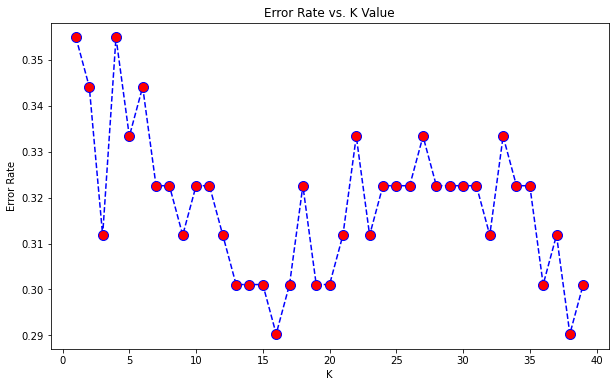

In [68]:

X = df_add[['age','adiposity','famhist','tobacco','ldl']].values
y = dataset.iloc[:, -1].values
scaled_features = standardise(X)


X=scaled_features

k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Disc_Uniform+Chi'] = result

In [69]:
 dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436],
 'SFS': [72.3936170212766,
  72.60867837819966,
  68.48803323582734,
  72.3936170212766,
  69.90961374697305,
  75.02873244560291,
  0.003904089132944743],
 'SBS': [72.14030218933087,
  72.47728488180442,
  68.21311210575917,
  72.14030218933087,
  69.5411905534536,
  75.66467321470195,
  0.00415654182434082],
 'MI': [70.71507863089732,
  70.83975112750359,
  65.98777611277612,
  70.71507863089732,
  67.45118384283109,
  75.45493584810009,
  0.003720560073852539],
 'Chi': [72.13675609004008,
  72.5364475518267,
  67.3223840973841,
  72.13675609004008,
  69.85189828916037,
  75.04167398739516,
  0.004279909133911132],
 'EFS': [71.75901942645699,
  71.78426358397

## Discetization(k-mean) + chi

In [57]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
num_cols.rename(columns = {0:'age', 1:'adiposity',2:'tobacco',3:'sbp',4:'ldl',5:'alcohol',6:'typea',7:'obesity'}, inplace = True)
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
X = df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)
 

age          2.003996e-18
tobacco      4.440949e-11
ldl          5.747629e-09
adiposity    2.474289e-06
famhist      7.681966e-05
sbp          1.424619e-04
obesity      1.937366e-01
typea        2.443699e-01
alcohol      5.524136e-01
dtype: float64

Minimum error:- 0.2903225806451613 at K = 38


[72.74036386062289,
 72.80559948077448,
 66.80744432582668,
 72.74036386062289,
 70.97789614293507,
 75.42799143635968,
 0.003616091410319011]

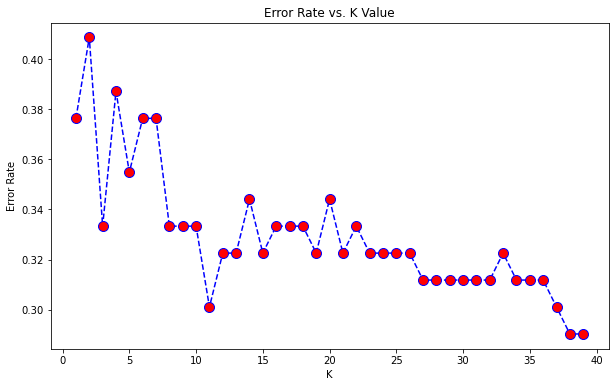

In [61]:
X = dataset [['age','adiposity','famhist','tobacco','ldl']].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
scaled_features = standardise(X)


X=scaled_features

k= hyper_tune(X,y)

result = calculate_model(k,X,y)

result
dict_knn['Disc_Kmeans+Chi'] = result
result

In [70]:
dict_knn

{'Std_scalar': [65.33610854147395,
  64.37409062301585,
  49.86373347155081,
  65.33610854147395,
  63.736592132468296,
  67.14554139740297,
  0.0033723092079162593],
 'Optimal_k': [72.18455134135061,
  72.42163909668734,
  68.26041227291228,
  72.18455134135061,
  69.57698847800677,
  74.89004588607652,
  0.004204994042714436],
 'SFS': [72.3936170212766,
  72.60867837819966,
  68.48803323582734,
  72.3936170212766,
  69.90961374697305,
  75.02873244560291,
  0.003904089132944743],
 'SBS': [72.14030218933087,
  72.47728488180442,
  68.21311210575917,
  72.14030218933087,
  69.5411905534536,
  75.66467321470195,
  0.00415654182434082],
 'MI': [70.71507863089732,
  70.83975112750359,
  65.98777611277612,
  70.71507863089732,
  67.45118384283109,
  75.45493584810009,
  0.003720560073852539],
 'Chi': [72.13675609004008,
  72.5364475518267,
  67.3223840973841,
  72.13675609004008,
  69.85189828916037,
  75.04167398739516,
  0.004279909133911132],
 'EFS': [71.75901942645699,
  71.78426358397

In [71]:
dataset

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

## Feature Importance  coefficient based on SVM


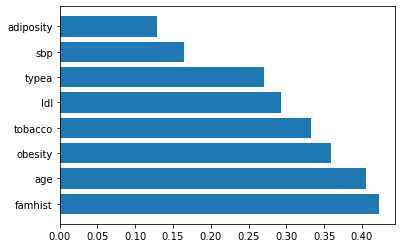

In [77]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

features_names = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
f_importances(abs(svm.coef_[0]), features_names, top=8)


Minimum error:- 0.25806451612903225 at K = 35


[71.69256860931236,
 71.41461998091265,
 63.94370519401478,
 71.69256860931236,
 70.05795277887162,
 75.0215700591335,
 0.003990513483683269]

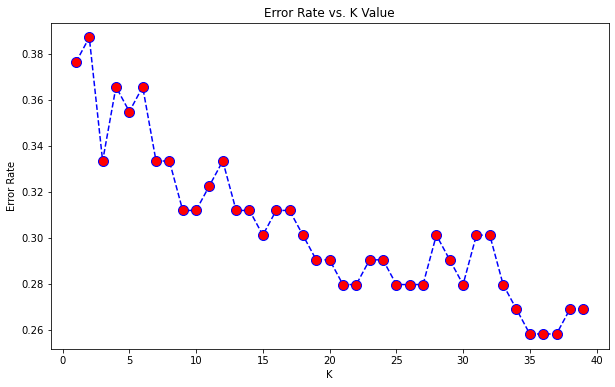

In [78]:
X = dataset[['famhist','age','obesity','tobacco','ldl','typea']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
X=scaled_features
k= hyper_tune(X,y)
result = calculate_model(k,X,y)

dict_knn['SVM_coeffients'] = result
result

In [79]:
 #del dict_knn['Disc_K+Chi']
dict_knn
df_dict = pd.DataFrame.from_dict(dict_knn,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','Cpu_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Std_scalar        65.336109  64.374091    49.863733  65.336109  63.736592   
Optimal_k         72.184551  72.421639    68.260412  72.184551  69.576988   
SFS               72.393617  72.608678    68.488033  72.393617  69.909614   
SBS               72.140302  72.477285    68.213112  72.140302  69.541191   
MI                70.715079  70.839751    65.987776  70.715079  67.451184   
Chi               72.136756  72.536448    67.322384  72.136756  69.851898   
EFS               71.759019  71.784264    66.597765  71.759019  69.337273   
Disc              70.924761  70.973717    64.897747  70.924761  68.328756   
Disc_Uniform+Chi  71.810052  71.715327    64.430186  71.810052  70.179431   
Disc_Kmeans+Chi   72.740364  72.805599    66.807444  72.740364  70.977896   
SVM_coeffients    71.692569  71.414620    63.943705  71.692569  70.057953   

                        Roc  Cpu_time  
Std_scalar        67.145541  0.003372  
Optimal_k         74.890046  0.004205  
SFS               75.028732  0.003904  
SBS               75.664673  0.004157  
MI                75.454936  0.003721  
Chi               75.041674  0.004280  
EFS               74.730371  0.003370  
Disc              73.922244  0.004485  
Disc_Uniform+Chi  73.151266  0.003358  
Disc_Kmeans+Chi   75.427991  0.003616  
SVM_coeffients    75.021570  0.003991

In [80]:
#df_dict.to_excel('knn_SA_30.xlsx')

In [6]:
#df_dict =  pd.read_excel('xl_result/knn_SA_30.xlsx',index_col=0)
#df_dict

In [7]:
# Adding Number of features
df_dict['no_of_features'] = [9,9,8,8,6,5,9,5,5,6]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Std_scalar        65.336109  64.374091    49.863733  65.336109  63.736592   
Optimal_k         72.184551  72.421639    68.260412  72.184551  69.576988   
SFS               72.393617  72.608678    68.488033  72.393617  69.909614   
SBS               72.140302  72.477285    68.213112  72.140302  69.541191   
MI                70.715079  70.839751    65.987776  70.715079  67.451184   
EFS               71.759019  71.784264    66.597765  71.759019  69.337273   
Disc              70.924761  70.973717    64.897747  70.924761  68.328756   
Disc_Uniform+Chi  71.810052  71.715327    64.430186  71.810052  70.179431   
Disc_Kmeans+Chi   72.740364  72.805599    66.807444  72.740364  70.977896   
SVM_coeffients    71.692569  71.414620    63.943705  71.692569  70.057953   

                        Roc  Cpu_time  no_of_features  
Std_scalar        67.145541  0.003372               9  
Optimal_k         74.890046  0.004205               9  
SFS               75.028732  0.003904               8  
SBS               75.664673  0.004157               8  
MI                75.454936  0.003721               6  
EFS               74.730371  0.003370               5  
Disc              73.922244  0.004485               9  
Disc_Uniform+Chi  73.151266  0.003358               5  
Disc_Kmeans+Chi   75.427991  0.003616               5  
SVM_coeffients    75.021570  0.003991               6